##Data Generation
    

In [42]:
#This file will generate data for training
#Temperature values range from 20C (death) to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    return  random.randrange(0, 100)

def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

def get_Label(age, temp, hr):
    label=0
    if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 6<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
        label=1
        return label

    return label

def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]

with open('Data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'Heart rate', 'Label'])
    for n in range(1, 300):
        writer.writerow(generate_DATA())

msft = pd.read_csv('Data.csv')


<AxesSubplot:xlabel='Age', ylabel='Heart rate'>

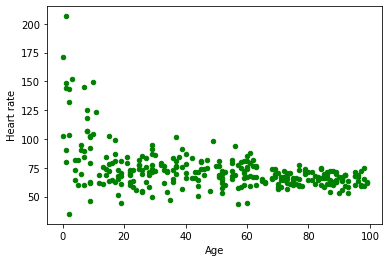

In [39]:
msft.plot(kind='scatter',x='Age',y='Heart rate', color ='green')


<AxesSubplot:xlabel='Age', ylabel='Temperature'>

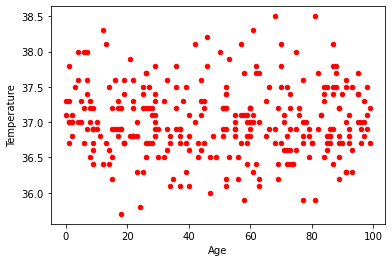

In [40]:
msft.plot(kind='scatter',x='Age',y='Temperature', color ='red')

<AxesSubplot:xlabel='Label'>

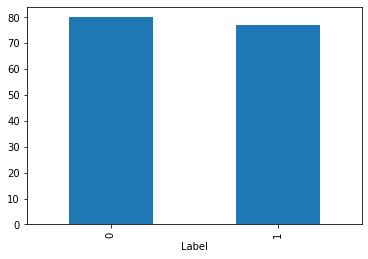

In [43]:
msft.groupby('Label')['Age'].nunique().plot(kind='bar')
